<img src="./img/DC_Gray _Logo.png">

<center><h2> Module 3 Project</h2></center>
<center><h2> Hypothesis Testing</h2></center>

**Authors:** Joe Read and Mohammed Hannan


#### Business Problem

#### Analysis

In [1]:
# import data_cleaning as dc
# dirty_data = pd.read_csv('./data/dirty_data.csv')
# cleaned_data = dc.full_clean(dirty_data)

import requests
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from hypothesis_tests import *

sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# Load our clean bikes dataframe

bikes_df = pd.read_pickle('bikes_dataframe')

In [3]:
bikes_df.head()

,name,time,num_bikes,num_empty,num_docks,coords,faulty,elevation,pop_dens,high_pop?,hill,num_faulty_near,faulty_near,num_faulty
0,"River Street , Clerkenwell",t1,4,15,19,"(51.529163, -0.10997)",False,31,10010,False,False,1,False,0
1,"Phillimore Gardens, Kensington",t1,14,23,37,"(51.499606, -0.197574)",False,17,11436,True,False,1,False,0
2,"Christopher Street, Liverpool Street",t1,25,6,32,"(51.521283, -0.084605)",True,27,10010,False,False,3,True,1
3,"St. Chad's Street, King's Cross",t1,20,3,23,"(51.530059, -0.120973)",False,22,10010,False,True,3,True,0
4,"New Globe Walk, Bankside",t1,7,12,19,"(51.507385, -0.09644)",False,16,10010,False,False,1,False,0


In [4]:
# We think we'll only get a small effect sizes so we explore what it a good number of times to take samples

from statsmodels.stats.power import tt_solve_power
for i in [0.10, 0.15, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]:
    n = int(tt_solve_power(alpha=0.05, effect_size= i, power=0.8))
    print("For an effect size of {} we need to sample {} times".format(i,n))

For an effect size of 0.1 we need to sample 786 times
For an effect size of 0.15 we need to sample 350 times
For an effect size of 0.2 we need to sample 198 times
For an effect size of 0.25 we need to sample 127 times
For an effect size of 0.3 we need to sample 89 times
For an effect size of 0.35 we need to sample 66 times
For an effect size of 0.4 we need to sample 51 times
For an effect size of 0.45 we need to sample 40 times
For an effect size of 0.5 we need to sample 33 times


## 1) A Faulty bikepoints will be more likely to have more than one other faulty bikepoints near it. 
## H0 = Faulty bikepoints have the same probabilty of having other faulty bikepoints near-by as non-faulty bikepoints
## H1 = Faulty bikepoints are more likely to have more than 1 faulty bikepoints near them than non-faulty bikepoints

In [5]:
# Non-faulty counts

(bikes_df.loc[bikes_df['faulty'] == False].faulty_near).value_counts()

False    270
True     243
Name: faulty_near, dtype: int64

In [6]:
# Faulty counts

(bikes_df.loc[bikes_df['faulty'] == True].faulty_near).value_counts()

False    151
True     116
Name: faulty_near, dtype: int64

In [7]:
# Split the dataframe

faulty_bikes_df, non_faulty_bikes_df = split_by_bool(bikes_df, 'faulty')

In [8]:
faulty_bikes_df.head()

,name,time,num_bikes,num_empty,num_docks,coords,faulty,elevation,pop_dens,high_pop?,hill,num_faulty_near,faulty_near,num_faulty
2,"Christopher Street, Liverpool Street",t1,25,6,32,"(51.521283, -0.084605)",True,27,10010,False,False,3,True,1
7,"Malet Street, Bloomsbury",t1,43,5,49,"(51.52168, -0.130431)",True,35,9279,False,False,1,False,1
9,"Belgrove Street , King's Cross",t1,24,16,48,"(51.529943, -0.123616)",True,24,10010,False,True,2,True,8
15,"Drummond Street , Euston",t1,16,10,28,"(51.527326, -0.136052)",True,28,9279,False,False,2,True,2
17,"Doric Way , Somers Town",t1,2,44,50,"(51.528833, -0.13225)",True,30,9279,False,False,2,True,4


In [9]:
non_faulty_bikes_df.head()

,name,time,num_bikes,num_empty,num_docks,coords,faulty,elevation,pop_dens,high_pop?,hill,num_faulty_near,faulty_near,num_faulty
0,"River Street , Clerkenwell",t1,4,15,19,"(51.529163, -0.10997)",False,31,10010,False,False,1,False,0
1,"Phillimore Gardens, Kensington",t1,14,23,37,"(51.499606, -0.197574)",False,17,11436,True,False,1,False,0
3,"St. Chad's Street, King's Cross",t1,20,3,23,"(51.530059, -0.120973)",False,22,10010,False,True,3,True,0
4,"New Globe Walk, Bankside",t1,7,12,19,"(51.507385, -0.09644)",False,16,10010,False,False,1,False,0
5,"Park Street, Bankside",t1,18,0,18,"(51.505974, -0.092754)",False,8,10010,False,False,2,True,0


In [10]:
# Taking our effect size to be 0.2 we need to sample 198 times

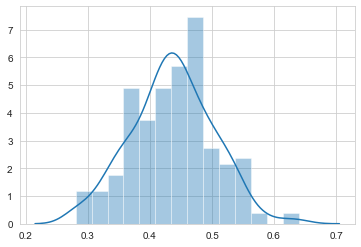

In [11]:
# Sample the bikespoints that are faulty
 
import scipy.stats
np.random.seed(3)
probs1_subsample1 = []
for i in range(198):
    sample = faulty_bikes_df.sample(n=50, replace = True)
    p = np.sum(sample.faulty_near)/50
    probs1_subsample1.append(p)

sns.distplot(probs1_subsample1, norm_hist= True)

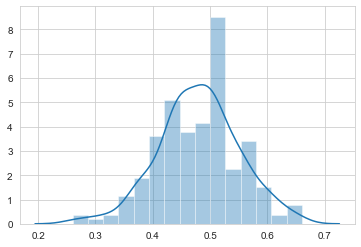

In [12]:
# Sample the non-faulty bikepoints

np.random.seed(3)
probs1_subsample2 = []
for i in range(198):
    sample = non_faulty_bikes_df.sample(n=50, replace = True)
    p = np.sum(sample.faulty_near)/50
    probs1_subsample2.append(p)


sns.distplot(probs1_subsample2, norm_hist= True)

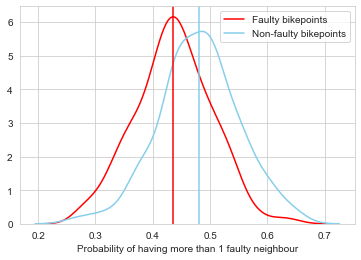

In [13]:
sns.distplot(probs1_subsample1, hist=False, norm_hist=True, label='Faulty bikepoints', color='red')
sns.distplot(probs1_subsample2, hist=False, norm_hist=True, label='Non-faulty bikepoints', color='skyblue')
plt.axvline(x = np.mean(probs1_subsample1), color='red')
plt.axvline(x = np.mean(probs1_subsample2), color='skyblue')
plt.xlabel('Probability of having more than 1 faulty neighbour')
plt.legend();

In [67]:
scipy.stats.normaltest(probs1_subsample1)

NormaltestResult(statistic=0.09751538061318213, pvalue=0.9524118803715452)

In [50]:
# As we have taken two samples from an unknown population we will use a 2 sample t-test
# We need to check if the variances of both samples are the same, if they aren't we'll have to use Welch's t-test

v11 = np.var(probs1_subsample1)
v12 = np.var(probs1_subsample2)

print('Faulty var = {}'.format(v11) + '\nNon-faulty var = {}'.format(v12))

Faulty var = 0.004447801244770941
Non-faulty var = 0.004943424140393838


In [62]:
math.sqrt(v11)

0.06669183791717649

In [51]:
# Need to take the ratio of the vars to see if they're close enough for a t test
# They are close enough so we go ahead with the t-test

v11/v12

0.899740972745379

In [16]:
results1 = scipy.stats.ttest_ind(probs1_subsample1, probs1_subsample2)
print(results1)

Ttest_indResult(statistic=-6.407828758218733, pvalue=4.217402024387721e-10)


In [66]:
# calculate Cohen's d

m11 = np.mean(probs1_subsample1)
m12 = np.mean(probs1_subsample2)

n11 = len(probs1_subsample1)
n12 = len(probs1_subsample2)

s1 = np.sqrt(((n11 - 1)*v11 + (n12 - 1)*v12) / (n11 + n12 - 2))


d1 = (m11 - m12)/(s1)
print(s1, d1, m11-m12)

0.0685245408053377 -0.645643498263004 -0.044242424242424194


We have a pvalue smaller than our alpha so we have enough data to reject the null hypothesis.
Our effect size is 0.65 which is higher than expected

## 2) Bikepoints at a high elevation are smaller.
## H0 = Bikepoints on hills have the same number of docks as bikepoints that are not on hills
## H1= Bikepoints on hills have fewer docks than bikepoints that are not on hills

In [17]:
hill_bikes_df, no_hill_bikes_df = split_by_bool(bikes_df, 'hill')

In [18]:
hill_bikes_df.head()

,name,time,num_bikes,num_empty,num_docks,coords,faulty,elevation,pop_dens,high_pop?,hill,num_faulty_near,faulty_near,num_faulty
3,"St. Chad's Street, King's Cross",t1,20,3,23,"(51.530059, -0.120973)",False,22,10010,False,True,3,True,0
8,"Scala Street, Fitzrovia",t1,13,8,21,"(51.519914, -0.136039)",False,37,9279,False,True,3,True,0
9,"Belgrove Street , King's Cross",t1,24,16,48,"(51.529943, -0.123616)",True,24,10010,False,True,2,True,8
10,"Great Russell Street, Bloomsbury",t1,15,11,26,"(51.517727, -0.127854)",False,37,9279,False,True,2,True,0
12,"Hatton Wall, Holborn",t1,10,16,26,"(51.521661, -0.109006)",False,25,10010,False,True,2,True,0


In [19]:
no_hill_bikes_df.head()

,name,time,num_bikes,num_empty,num_docks,coords,faulty,elevation,pop_dens,high_pop?,hill,num_faulty_near,faulty_near,num_faulty
0,"River Street , Clerkenwell",t1,4,15,19,"(51.529163, -0.10997)",False,31,10010,False,False,1,False,0
1,"Phillimore Gardens, Kensington",t1,14,23,37,"(51.499606, -0.197574)",False,17,11436,True,False,1,False,0
2,"Christopher Street, Liverpool Street",t1,25,6,32,"(51.521283, -0.084605)",True,27,10010,False,False,3,True,1
4,"New Globe Walk, Bankside",t1,7,12,19,"(51.507385, -0.09644)",False,16,10010,False,False,1,False,0
5,"Park Street, Bankside",t1,18,0,18,"(51.505974, -0.092754)",False,8,10010,False,False,2,True,0


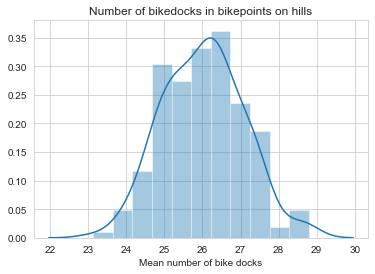

In [20]:
# Sample the mean number of docks from bikespoints that are on a hill
 
np.random.seed(3)
probs2_subsample1 = []
for i in range(198):
    sample = hill_bikes_df.sample(n=50, replace = True)
    docks = sample.num_docks
    probs2_subsample1.append(np.mean(docks))

sns.distplot(probs2_subsample1, norm_hist= True)
plt.xlabel('Mean number of bike docks')
plt.title('Number of bikedocks in bikepoints on hills');

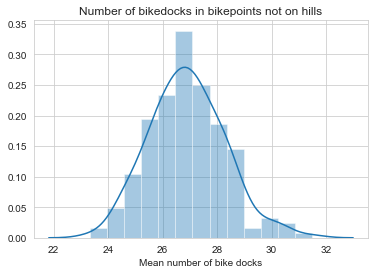

In [21]:
# Sample the mean number of docks from bikespoints that are not on a hill
 
np.random.seed(3)
probs2_subsample2 = []
for i in range(198):
    sample = no_hill_bikes_df.sample(n=50, replace = True)
    docks = sample.num_docks
    probs2_subsample2.append(np.mean(docks))

sns.distplot(probs2_subsample2, norm_hist= True)
plt.xlabel('Mean number of bike docks')
plt.title('Number of bikedocks in bikepoints not on hills');

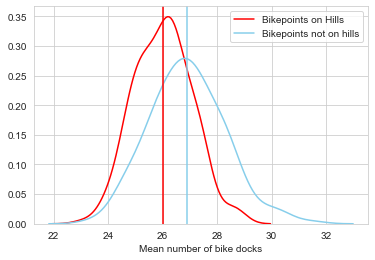

In [22]:
sns.distplot(probs2_subsample1, hist=False, norm_hist=True, label='Bikepoints on Hills', color='red')
sns.distplot(probs2_subsample2, hist=False, norm_hist=True, label='Bikepoints not on hills', color='skyblue')
plt.axvline(x = np.mean(probs2_subsample1), color='red')
plt.axvline(x = np.mean(probs2_subsample2), color='skyblue')
plt.xlabel('Mean number of bike docks')
plt.legend();

In [54]:
# As we have taken two samples from an unknown population we will use a 2 sample t-test
# We need to check if the variances of both samples are the same, if they aren't we'll have to use Welch's t-test

v21 = np.var(probs2_subsample1)
v22 = np.var(probs2_subsample2)

print('Faulty var = {}'.format(v21) + '\nNon-faulty var = {}'.format(v22))

Faulty var = 1.1002545046423833
Non-faulty var = 1.8982498214467909


In [55]:
# Need to take the ratio of the vars to see if they're close enough for a t test
# They are not close enough so we use a Welch t-test

v21/v22

0.5796152288342118

In [56]:
results2 = scipy.stats.ttest_ind(probs2_subsample1, probs2_subsample2, equal_var=False)
print(results2)

Ttest_indResult(statistic=-7.151686819024998, pvalue=4.657931549223401e-12)


In [71]:
# calculate Cohen's d

m21 = np.mean(probs2_subsample1)
m22 = np.mean(probs2_subsample2)

n21 = len(probs2_subsample1)
n22 = len(probs2_subsample2)

s2 = np.sqrt(((n21 - 1)*v21 + (n22 - 1)*v22) / (n21 + n22 - 2))

d2 = (m21 - m22)/(s2)
d2

-0.7205935536892039

## 3) Bikepoints in high populated areas are more likely to be faulty.
## H0 = Bikepoints in highly populated areas have the same probability of having a faulty dock as general bikepoints
## H1 = Bikepoints in highly populated areas have a higher probability of having a faulty dock


In [26]:
high_pop_bikes_df, low_pop_bikes_df = split_by_bool(bikes_df, 'high_pop?')

In [27]:
high_pop_bikes_df.head()

,name,time,num_bikes,num_empty,num_docks,coords,faulty,elevation,pop_dens,high_pop?,hill,num_faulty_near,faulty_near,num_faulty
1,"Phillimore Gardens, Kensington",t1,14,23,37,"(51.499606, -0.197574)",False,17,11436,True,False,1,False,0
24,"Commercial Street, Shoreditch",t1,15,1,16,"(51.52127, -0.075578)",False,21,11050,True,False,2,True,0
30,"Nesham Street, Wapping",t1,14,2,16,"(51.507131, -0.06691)",False,16,11050,True,False,1,False,0
39,"New Inn Yard, Shoreditch",t1,11,8,20,"(51.524526, -0.079248)",True,23,11050,True,True,2,True,1
57,"Tanner Street, Bermondsey",t1,15,23,40,"(51.500647, -0.0786)",True,9,11050,True,False,1,False,2


In [28]:
low_pop_bikes_df.head()

,name,time,num_bikes,num_empty,num_docks,coords,faulty,elevation,pop_dens,high_pop?,hill,num_faulty_near,faulty_near,num_faulty
0,"River Street , Clerkenwell",t1,4,15,19,"(51.529163, -0.10997)",False,31,10010,False,False,1,False,0
2,"Christopher Street, Liverpool Street",t1,25,6,32,"(51.521283, -0.084605)",True,27,10010,False,False,3,True,1
3,"St. Chad's Street, King's Cross",t1,20,3,23,"(51.530059, -0.120973)",False,22,10010,False,True,3,True,0
4,"New Globe Walk, Bankside",t1,7,12,19,"(51.507385, -0.09644)",False,16,10010,False,False,1,False,0
5,"Park Street, Bankside",t1,18,0,18,"(51.505974, -0.092754)",False,8,10010,False,False,2,True,0


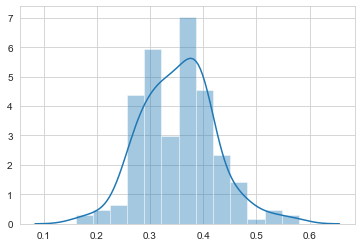

In [58]:
np.random.seed(3)
probs3_subsample1 = []
for i in range(198):
    sample = high_pop_bikes_df.sample(n=50, replace = True)
    p = np.sum(sample['faulty'])/50
    probs3_subsample1.append(p)

sns.distplot(probs3_subsample1, norm_hist= True);

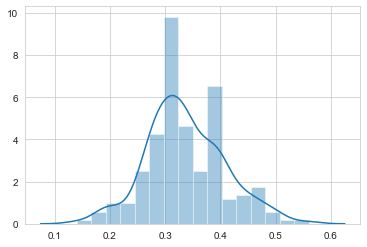

In [59]:
np.random.seed(3)
probs3_subsample2 = []
for i in range(198):
    sample = low_pop_bikes_df.sample(n=50, replace = True)
    p = np.sum(sample.faulty)/50
    probs3_subsample2.append(p)


sns.distplot(probs3_subsample2, norm_hist = True);

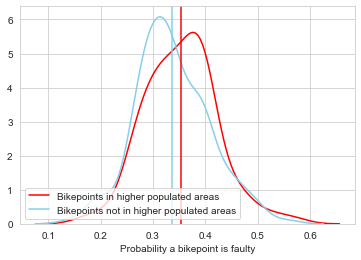

In [61]:
sns.distplot(probs3_subsample1, hist=False, norm_hist=True, label='Bikepoints in higher populated areas', color='red')
sns.distplot(probs3_subsample2, hist=False, norm_hist=True, label='Bikepoints not in higher populated areas', color='skyblue')
plt.axvline(x = np.mean(probs3_subsample1), color='red')
plt.axvline(x = np.mean(probs3_subsample2), color='skyblue')
plt.xlabel('Probability a bikepoint is faulty')
plt.legend(loc = 3);

In [68]:
# As we have taken two samples from an unknown population we will use a 2 sample t-test
# We need to check if the variances of both samples are the same, if they aren't we'll have to use Welch's t-test

v31 = np.var(probs3_subsample1)
v32 = np.var(probs3_subsample2)

print('Faulty var = {}'.format(v31) + '\nNon-faulty var = {}'.format(v32))

Faulty var = 0.004727935924905622
Non-faulty var = 0.005033241505968779


In [70]:
# Need to take the ratio of the vars to see if they're close enough for a t test
# They are close enough so we can use a 2 sample t-test

v31/v32

0.9393421554079803

In [60]:
results3 = stats.ttest_ind(probs3_subsample1, probs3_subsample2)
print(results3)

Ttest_indResult(statistic=2.310322943037043, pvalue=0.021386186208782073)


In [72]:
# calculate Cohen's d

m31 = np.mean(probs3_subsample1)
m32 = np.mean(probs3_subsample2)

n31 = len(probs3_subsample1)
n32 = len(probs3_subsample2)

s3 = np.sqrt(((n31 - 1)*v31 + (n32 - 1)*v32) / (n31 + n32 - 2))

d3 = (m31 - m32)/(s3)
d3

0.23278477676959133

## 4) Higher populated areas have larger bikepoints
## H0 = Bikepoints in highly populated areas have the same number of docks as non-highly populated bikepoints
## H1 = Bikepoints in highly populated areas have more docks than non-highly populated bikepoints

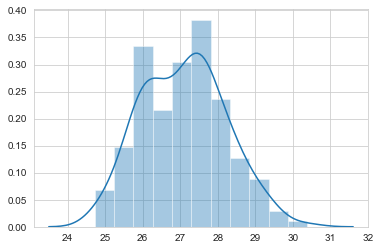

In [73]:
np.random.seed(3)
probs4_subsample1 = []
for i in range(198):
    sample = high_pop_bikes_df.sample(n=50, replace = True)
    p = np.sum(sample.num_docks)/50
    probs4_subsample1.append(p)

sns.distplot(probs4_subsample1, norm_hist= True);

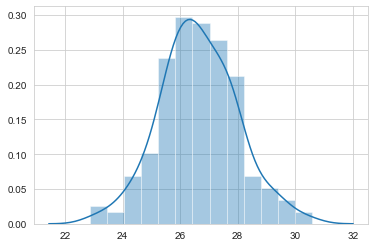

In [74]:
np.random.seed(3)
probs4_subsample2 = []
for i in range(198):
    sample = low_pop_bikes_df.sample(n=50, replace = True)
    p = np.sum(sample.num_docks)/50
    probs4_subsample2.append(p)

sns.distplot(probs4_subsample2, norm_hist= True);

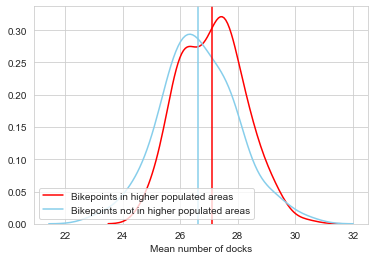

In [75]:
sns.distplot(probs4_subsample1, hist=False, norm_hist=True, label='Bikepoints in higher populated areas', color='red')
sns.distplot(probs4_subsample2, hist=False, norm_hist=True, label='Bikepoints not in higher populated areas', color='skyblue')
plt.axvline(x = np.mean(probs4_subsample1), color='red')
plt.axvline(x = np.mean(probs4_subsample2), color='skyblue')
plt.xlabel('Mean number of docks')
plt.legend(loc = 3);

In [77]:
# As we have taken two samples from an unknown population we will use a 2 sample t-test
# We need to check if the variances of both samples are the same, if they aren't we'll have to use Welch's t-test

v41 = np.var(probs4_subsample1)
v42 = np.var(probs4_subsample2)

print('Faulty var = {}'.format(v41) + '\nNon-faulty var = {}'.format(v42))

Faulty var = 1.225336271808999
Non-faulty var = 1.7942611570247933


In [80]:
# Need to take the ratio of the vars to see if they're close enough for a t test
# They are not close enough so we use a Welch t-test

v41/v42

0.6829196892613038

In [79]:
results4 = stats.ttest_ind(probs4_subsample1, probs4_subsample2, equal_var=False)
print(results4)

Ttest_indResult(statistic=3.7350737661519346, pvalue=0.00021638510396394984)


In [81]:
# calculate Cohen's d

m41 = np.mean(probs4_subsample1)
m42 = np.mean(probs4_subsample2)

n41 = len(probs4_subsample1)
n42 = len(probs4_subsample2)

s4 = np.sqrt(((n41 - 1)*v41 + (n42 - 1)*v42) / (n41 + n42 - 2))

d4 = (m41 - m42)/(s4)
d4

0.376340595799422

#### Findings & Application

#### Limitations

#### Next Steps